In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv(r"/Users/tejaspatel/IdeaProjects/bnb-case-study/data/raw-bnb.data")

In [18]:
data.head()

,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365.00,NaN,NaN
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194.0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1.0,0.0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1.0,129.0


In [19]:
cols =['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']

data = pd.read_csv(r"/Users/tejaspatel/IdeaProjects/bnb-case-study/data/raw-bnb.data", names=cols)

In [20]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365.00,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1.0,0.0


In [21]:
continuous_values_cols = ['host_id','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

data = data[continuous_values_cols]
data.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6.0,365.0
1,2845,40.75362,-73.98377,225,1,45,0.38,2.0,355.0
2,4632,40.80902,-73.94190,150,3,0,365.00,NaN,NaN
3,4869,40.68514,-73.95976,89,1,270,4.64,1.0,194.0
4,7192,40.79851,-73.94399,80,10,9,0.10,1.0,0.0


In [22]:
data = data.astype('float')
data.isnull().sum()

host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    1
availability_365                  1
dtype: int64

In [23]:
data = data.dropna(subset=['availability_365'])
data.isnull().sum()

host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [24]:
data = data.fillna(data.mean())

In [25]:
data.isnull().sum()

host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
target = data['availability_365']
data = (data - data.min())/(data.max() - data.min())
data['availability_365'] = target
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.393981,0.569633,0.545457,0.395722,0.103106,0.286573,0.297357,0.105882,135.588235
std,0.299549,0.314004,0.285952,0.307369,0.259531,0.268743,0.317294,0.274933,149.048674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249683,0.283934,0.331701,0.151515,0.000000,0.095012,0.066079,0.000000,6.000000
50%,0.270605,0.606604,0.545217,0.363636,0.011236,0.247031,0.196035,0.000000,46.000000
75%,0.505864,0.754159,0.742573,0.539394,0.022472,0.425178,0.356828,0.000000,220.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,365.000000


In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

def knn_train_test(train_col, target_col, rdata):

    # initialize knn regressor
    knn = KNeighborsRegressor()
    np.random.seed(41)

    # Permute the order in the data
    shuffled_index = np.random.permutation(rdata.index)
    rand_data = rdata.reindex(shuffled_index)

    # Define first half of the data
    last_train_row = int(len(rand_data) / 2)

    # Select the first half and set as training set
    # Select the second half and set as test set
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]

    # Fit a KNN model using the default k value
    knn.fit(train_data[[train_col]], train_data[target_col])

    # Make predictions using model
    prediction = knn.predict(test_data[[train_col]])

    # Calculate r2 score
    r2 = r2_score(test_data[target_col], prediction)

    return r2

In [28]:
rmse_results = dict()
train_cols = data.columns.drop('price')

# For each column (without price), train a model, return RMSE value
# and add to the dictionary rmse_results.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', data)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values(ascending=False)

availability_365                  0.200874
number_of_reviews                -0.035760
host_id                          -0.049487
reviews_per_month                -0.084092
longitude                        -0.107596
minimum_nights                   -0.109578
calculated_host_listings_count   -0.135291
latitude                         -0.278687
dtype: float64

Text(0.5, 1.0, 'Price vs number_of_reviews')

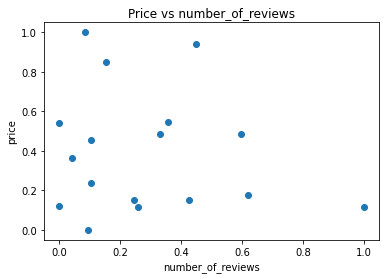

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

np.corrcoef(data['price'], data['number_of_reviews'])
plt.scatter(data['number_of_reviews'], data['price'])
plt.xlabel("number_of_reviews")
plt.ylabel("price")
plt.title("Price vs number_of_reviews")